# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [5]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
        self.Q={}
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)    
        action = np.random.choice(self.num_actions) 
        if stateStr not in self.Q:
            self.Q[stateStr] = np.zeros(self.num_actions)
            
        ## TODO 2
        ## Implement epsilon greedy policy here
        choice = np.random.binomial(1, self.epsilon)
        if choice == 0:
            idx = np.where(self.Q[stateStr] == np.max(self.Q[stateStr]))
            action = np.random.choice(idx[0])
        return action

        
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the q-learning update here
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s')) - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """
        if state2Str not in self.Q:
            self.Q[state2Str]=np.zeros((self.num_actions,))
        
        td_target=reward + self.gamma * np.max(self.Q[state2Str])
        td_error=td_target-self.Q[state1Str][action1]
        
        self.Q[state1Str][action1] += self.alpha * td_error 

<IPython.core.display.Javascript object>


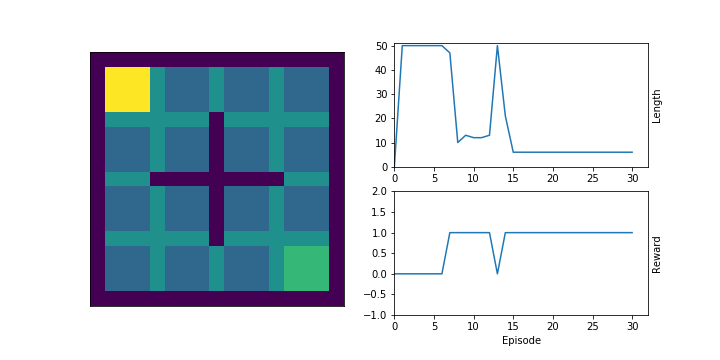

<IPython.core.display.Javascript object>


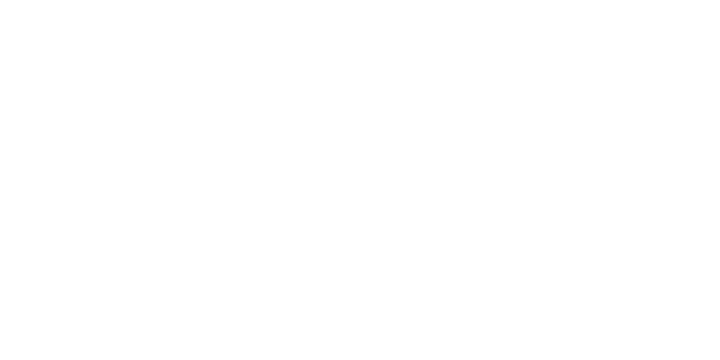

In [8]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(30, interactive)

<Figure size 720x360 with 0 Axes>

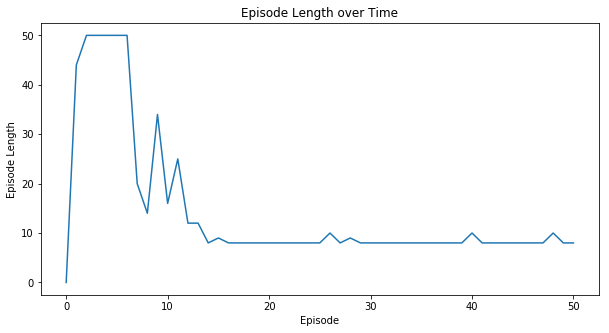

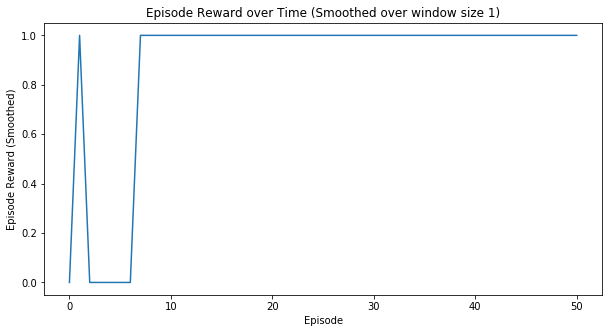

In [6]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

<IPython.core.display.Javascript object>


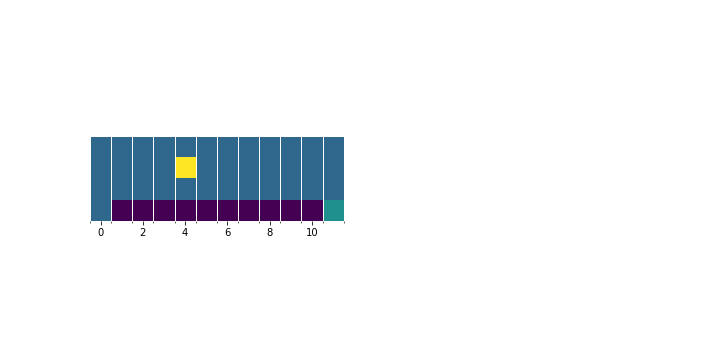

KeyboardInterrupt: 

In [9]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

<Figure size 720x360 with 0 Axes>

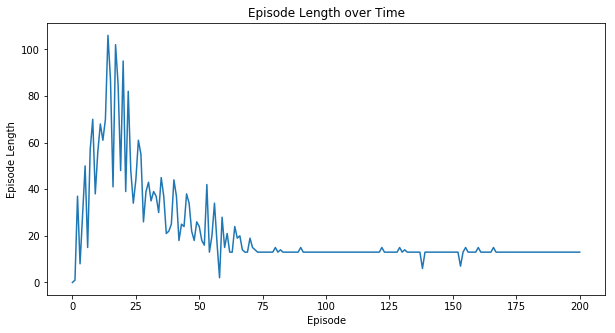

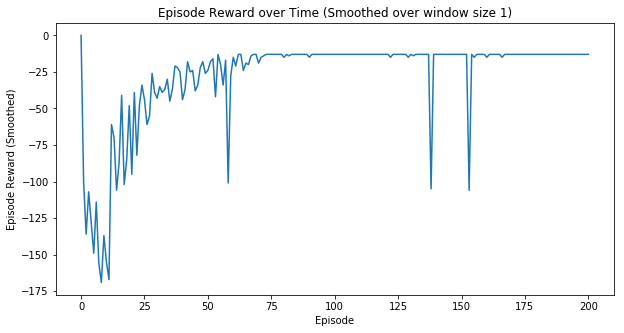

In [11]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(200, interactive)

<Figure size 720x360 with 0 Axes>

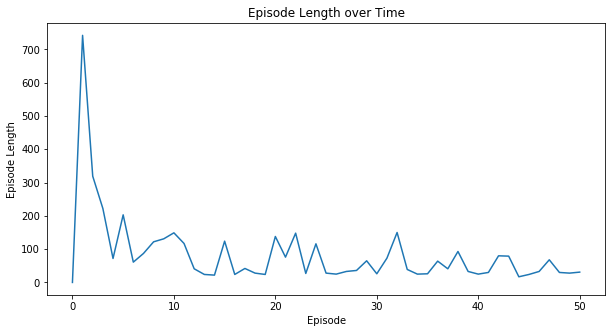

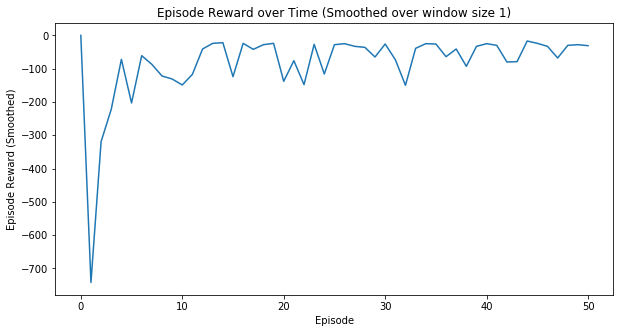

In [12]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)